In [22]:
import cv2
import extcolors
from colormap import rgb2hex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

C:\Users\Júlia Garcia Torné\AppData\Local\Temp\ipykernel_4020\3207708384.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


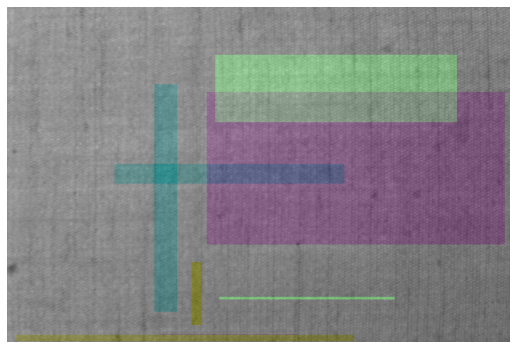

In [23]:
input_name = 'DATASET/A3/to/c1r1e0n2-0.png'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

plt.figure(figsize=(9, 9))
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
colors_x = extcolors.extract_from_path('DATASET/A3/to/c1r1e0n2-0.png', tolerance = 12, limit = 12)
colors_x

([((140, 140, 140), 247433),
  ((128, 92, 128), 82898),
  ((140, 192, 140), 22007),
  ((93, 140, 140), 15344),
  ((108, 108, 108), 8465),
  ((128, 128, 70), 6588),
  ((93, 100, 136), 6299),
  ((142, 158, 142), 3908),
  ((106, 158, 106), 98),
  ((110, 126, 110), 65),
  ((98, 62, 98), 34),
  ((172, 172, 172), 29)],
 393216)

In [25]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#8C8C8C,247433
1,#805C80,82898
2,#8CC08C,22007
3,#5D8C8C,15344
4,#6C6C6C,8465
5,#808046,6588
6,#5D6488,6299
7,#8E9E8E,3908
8,#6A9E6A,98
9,#6E7E6E,65


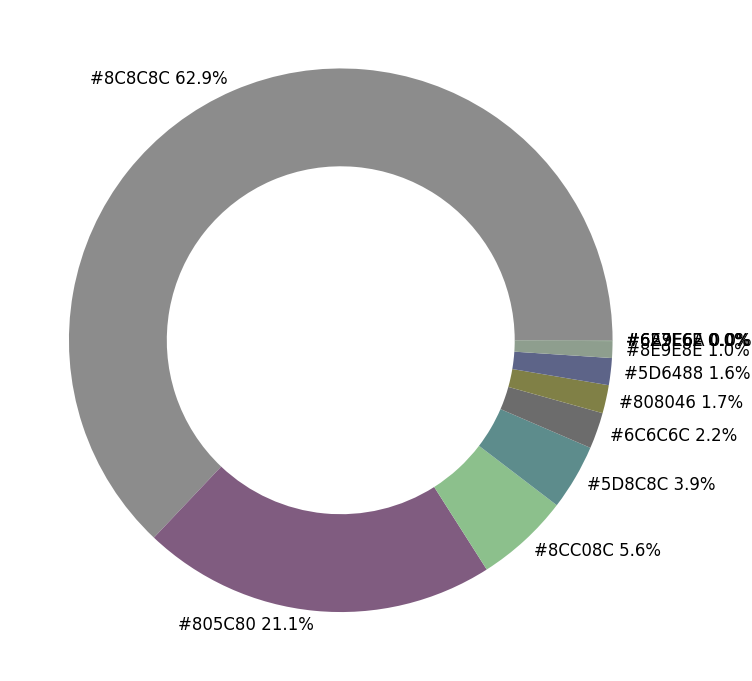

In [26]:

list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

In [152]:
img = cv2.imread('DATASET/A3/to/c1r1e0n2-0.png')

print("The shape of the image is ",img.shape)

The shape of the image is  (512, 768, 3)


In [162]:
v = 131, 158, 131
v2= 145, 204, 145

In [163]:
Mask = cv2.inRange(img, v, v2)

mask_yellow = cv2.bitwise_not(Mask)

result = cv2.bitwise_and(img, img, mask = mask_yellow)

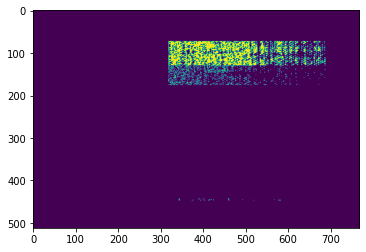

In [167]:
plt.imshow(Mask)
plt.show()

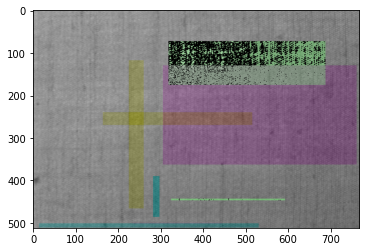

In [171]:
plt.imshow(result)
plt.show()